# NEURAL NETWORK ALGO

In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from itertools import product

import warnings
warnings.filterwarnings('ignore')

plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [15, 5]

In [2]:
ROOT_DIR = os.path.relpath("C:\Temp\MeasHydroDone\VarPompe\Features")
os.chdir(ROOT_DIR)

In [3]:
"""
    Split dataset into train/test (70/30)
"""
def split_dataset(dataset, testsize=0.1):
    train, test = train_test_split(dataset, test_size=testsize, random_state=35)
    train_labels = train['FlowRate'].astype(float).to_numpy()
    train_features = train.drop(['FlowRate'], axis=1)
    test_labels = test['FlowRate'].astype(float).to_numpy()
    test_features = test.drop(['FlowRate'], axis=1)

    print("Train data = ", len(train_features), " Test data = ", len(test_features))
    return train_features, train_labels, test_features, test_labels

In [4]:
"""
    Scale the train and the test set
"""
def scale_features(train_features, test_features):
    scaler = StandardScaler()
    scaler.fit(train_features)
    train_features_n = scaler.transform(train_features)
    test_features_n = scaler.transform(test_features)
    return train_features_n, test_features_n

In [14]:
"""
    PCA for dimentionaly reduction
"""
def reduce_features(train_features_n, test_features_n):
    pca = PCA(0.99)  # Variance of the features
    pca.fit(train_features_n)
    print(pca.n_components_)
    print(pca.components_)
    print(pca.explained_variance_)
    print(pca.explained_variance_ratio_)
    train_features_pca = pca.transform(train_features_n)
    test_features_pca = pca.transform(test_features_n)
    return train_features_pca, test_features_pca

In [6]:
"""
    Prepare the model with Keras
"""
def make_model(input_shape, hidden_layer, fct_mlp='relu', fct_out='tanh'):
    input_layer = keras.layers.Input(input_shape)
    previous_layer = input_layer
    for layer in hidden_layer:
        next_layer = keras.layers.Dense(layer)(previous_layer)
        previous_layer = keras.layers.Activation(fct_mlp)(next_layer)
    output_layer = keras.layers.Dense(1)(previous_layer)
    output_layer = keras.layers.Activation(fct_out)(output_layer)
    return keras.models.Model(inputs=input_layer, outputs=output_layer)

In [7]:
"""
    Display loss according to the keras history
"""
def display_loss(history):
    metric = "loss"
    plt.figure()
    plt.plot(history.history[metric])
    plt.plot(history.history["val_" + metric])
    plt.title("model " + metric)
    plt.ylabel(metric, fontsize="large")
    plt.xlabel("epoch", fontsize="large")
    plt.legend(["train", "val"], loc="best")
    plt.show()
    plt.close()

In [8]:
"""
    Plot test prediction VS test labels
"""
def plotTestPred(test_labels, test_predictions):
    diff_pred = test_predictions - test_labels
    print("Diff Min = ", diff_pred.min(), " Max = ", diff_pred.max())
    a = plt.axes(aspect='equal')
    plt.scatter(test_labels, test_predictions)
    plt.xlabel('True Values [MPG]')
    plt.ylabel('Predictions [MPG]')
    lims = [9, 40]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims)
    plt.show()

In [21]:
# Pre-processing of the features
file = ['C:/Temp/MeasHydroDone/Features/features_50_150.csv']
dataset = pd.read_csv(file[0])
dataset = dataset.drop(dataset.columns[0], axis=1)
print(dataset.columns)
train_X, train_y, test_X, test_y = split_dataset(dataset, testsize=0.2)
train_X_n, test_X_n = scale_features(train_X, test_X)
pca = PCA(0.99)  # Variance of the features
pca.fit(train_X_n)
print(pca.n_components_)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
train_features_pca = pca.transform(train_X_n)
dataset = dataset.drop(dataset.columns[0], axis=1)
print(pd.DataFrame(pca.components_,columns=dataset.columns,index = ['V1','V2','V3','V4','V5','V6','V7']))

Index(['FlowRate', 's1_fft_Min', 's1_fft_Max', 's1_fft_MinMax',
       's1_fft_ArithMean', 's1_fft_MeanAbs', 's1_fft_RMS', 's1_fft_StandDev',
       's1_fft_Variance', 's1_fft_Skewness', 's1_fft_Kurthosis',
       's1_fft_Median', 's1_fft_Moment3', 's1_fft_Moment4', 's1_fft_Moment5',
       's1_fft_Moment6', 's1_fft_ShapeFactor'],
      dtype='object')
Train data =  684  Test data =  172
7
[9.81897924 1.51030118 1.27924283 0.99242481 0.88876698 0.74339391
 0.52992634]
[0.61706691 0.09491383 0.08039312 0.06236825 0.05585394 0.04671807
 0.03330285]
    s1_fft_Min  s1_fft_Max  s1_fft_MinMax  s1_fft_ArithMean  s1_fft_MeanAbs  \
V1    0.225465    0.307385       0.307329          0.305515        0.305515   
V2    0.059600   -0.175919      -0.176325         -0.212953       -0.212953   
V3   -0.002923    0.015013       0.015043          0.042530        0.042530   
V4    0.059920   -0.045902      -0.046111          0.063231        0.063231   
V5   -0.125287    0.007604       0.007906         -0

### PSEUDO GRID SEARCH WITH NN

Train data =  684  Test data =  172
7
Model : 
    MLP         :  [5, 5]
    Fct_MLP     :  tanh
    Fct_Out     :  tanh

Epoch 00128: early stopping
MSE :  503.45227
Diff Min =  -33.9  Max =  -8.2


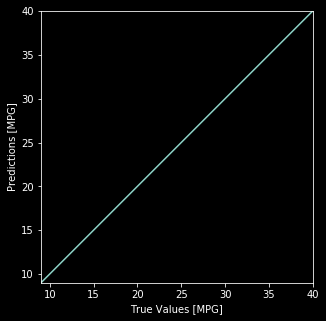

Model : 
    MLP         :  [5, 5]
    Fct_MLP     :  tanh
    Fct_Out     :  relu

Epoch 00304: early stopping
MSE :  6.910092
Diff Min =  -7.425353431701659  Max =  7.326823425292968


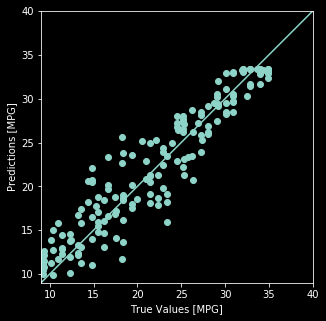

Model : 
    MLP         :  [5, 5]
    Fct_MLP     :  tanh
    Fct_Out     :  linear

Epoch 00347: early stopping
MSE :  6.763463
Diff Min =  -7.3971866607666  Max =  8.080136489868163


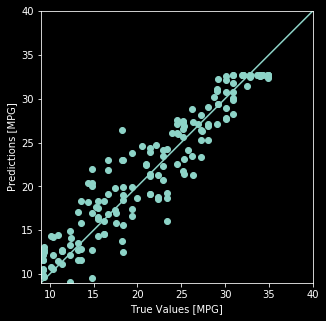

Model : 
    MLP         :  [5, 5]
    Fct_MLP     :  relu
    Fct_Out     :  tanh

Epoch 00134: early stopping
MSE :  503.45227
Diff Min =  -33.9  Max =  -8.2


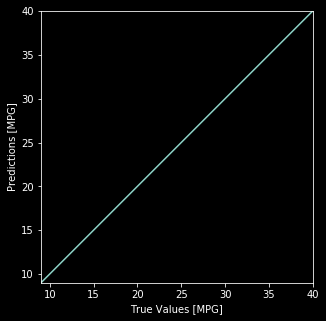

Model : 
    MLP         :  [5, 5]
    Fct_MLP     :  relu
    Fct_Out     :  relu

Epoch 00450: early stopping
MSE :  9.965274
Diff Min =  -8.066995048522948  Max =  9.861649703979491


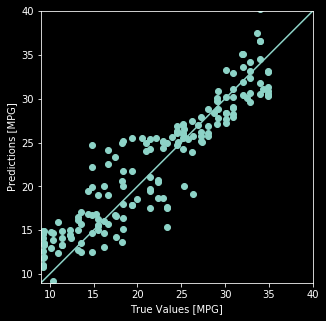

Model : 
    MLP         :  [5, 5]
    Fct_MLP     :  relu
    Fct_Out     :  linear

MSE :  8.459723
Diff Min =  -7.713632965087889  Max =  7.23494644165039


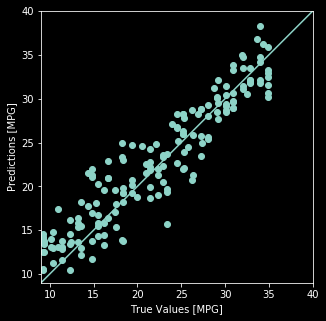

Model : 
    MLP         :  [10, 10]
    Fct_MLP     :  tanh
    Fct_Out     :  tanh

Epoch 00128: early stopping
MSE :  503.45227
Diff Min =  -33.9  Max =  -8.19999988079071


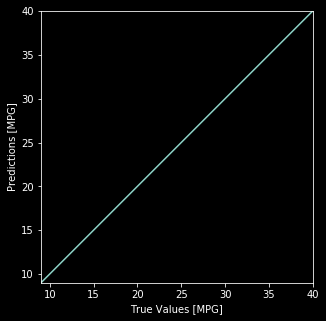

Model : 
    MLP         :  [10, 10]
    Fct_MLP     :  tanh
    Fct_Out     :  relu

Epoch 00288: early stopping
MSE :  7.166528
Diff Min =  -7.362547302246092  Max =  7.282347869873046


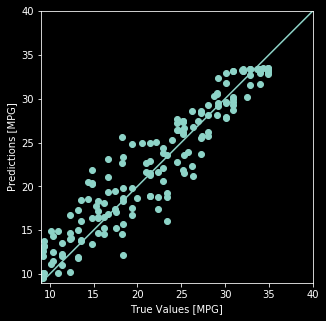

Model : 
    MLP         :  [10, 10]
    Fct_MLP     :  tanh
    Fct_Out     :  linear

Epoch 00206: early stopping
MSE :  7.282556
Diff Min =  -7.5717338562011705  Max =  7.855418395996093


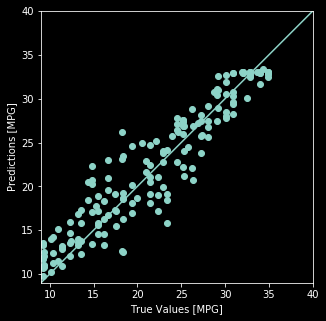

Model : 
    MLP         :  [10, 10]
    Fct_MLP     :  relu
    Fct_Out     :  tanh

Epoch 00113: early stopping
MSE :  503.45227
Diff Min =  -33.9  Max =  -8.2


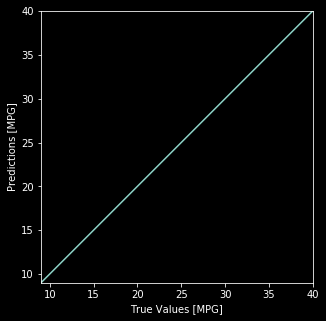

Model : 
    MLP         :  [10, 10]
    Fct_MLP     :  relu
    Fct_Out     :  relu

Epoch 00272: early stopping
MSE :  7.995027
Diff Min =  -7.789673233032225  Max =  7.428326797485351


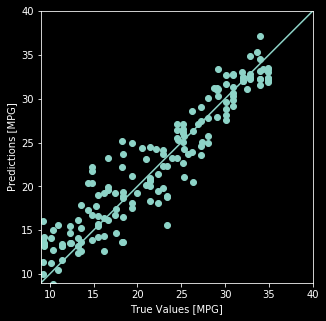

Model : 
    MLP         :  [10, 10]
    Fct_MLP     :  relu
    Fct_Out     :  linear

Epoch 00296: early stopping
MSE :  7.544899
Diff Min =  -8.046890640258788  Max =  7.925500106811523


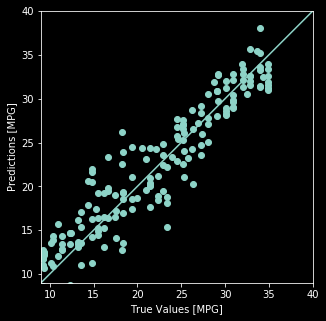

Model : 
    MLP         :  [5, 10]
    Fct_MLP     :  tanh
    Fct_Out     :  tanh

Epoch 00125: early stopping
MSE :  503.45227
Diff Min =  -33.9  Max =  -8.2


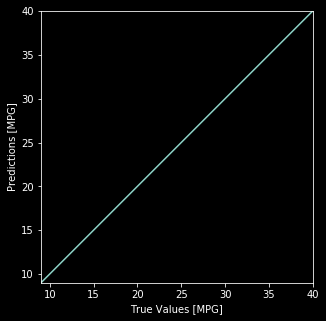

Model : 
    MLP         :  [5, 10]
    Fct_MLP     :  tanh
    Fct_Out     :  relu

Epoch 00257: early stopping
MSE :  7.7913585
Diff Min =  -13.20570602416992  Max =  7.286753845214843


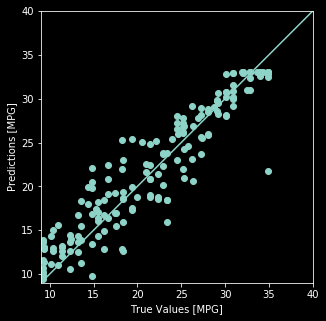

Model : 
    MLP         :  [5, 10]
    Fct_MLP     :  tanh
    Fct_Out     :  linear

Epoch 00332: early stopping
MSE :  6.707413
Diff Min =  -7.505589866638182  Max =  7.8504802703857415


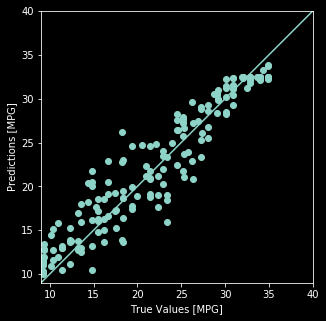

Model : 
    MLP         :  [5, 10]
    Fct_MLP     :  relu
    Fct_Out     :  tanh

Epoch 00113: early stopping
MSE :  503.45227
Diff Min =  -33.9  Max =  -8.2


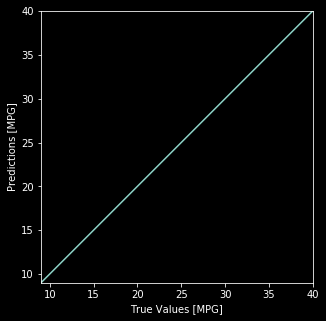

Model : 
    MLP         :  [5, 10]
    Fct_MLP     :  relu
    Fct_Out     :  relu

Epoch 00300: early stopping
MSE :  10.796158
Diff Min =  -8.416660690307616  Max =  9.30324821472168


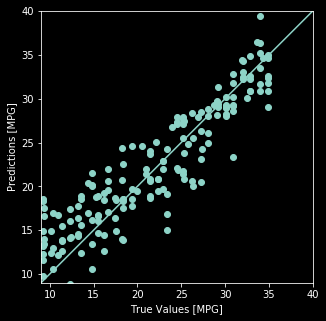

Model : 
    MLP         :  [5, 10]
    Fct_MLP     :  relu
    Fct_Out     :  linear

Epoch 00382: early stopping
MSE :  7.5907054
Diff Min =  -7.576550865173338  Max =  7.607232284545898


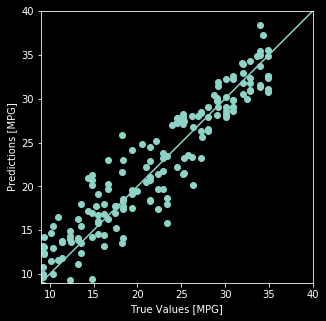

Model : 
    MLP         :  [10, 5]
    Fct_MLP     :  tanh
    Fct_Out     :  tanh

Epoch 00136: early stopping
MSE :  503.45227
Diff Min =  -33.9  Max =  -8.2


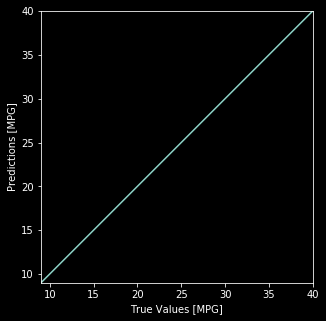

Model : 
    MLP         :  [10, 5]
    Fct_MLP     :  tanh
    Fct_Out     :  relu

Epoch 00317: early stopping
MSE :  6.562111
Diff Min =  -7.719785118103026  Max =  7.538821411132812


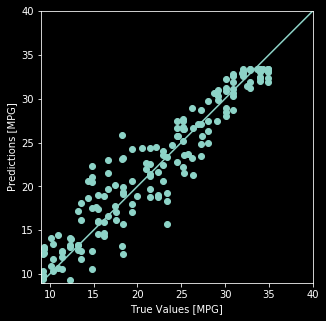

Model : 
    MLP         :  [10, 5]
    Fct_MLP     :  tanh
    Fct_Out     :  linear

Epoch 00241: early stopping
MSE :  6.744603
Diff Min =  -7.520695114135741  Max =  7.553694915771484


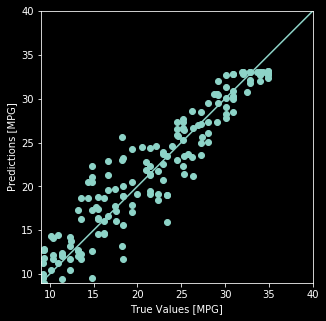

Model : 
    MLP         :  [10, 5]
    Fct_MLP     :  relu
    Fct_Out     :  tanh

Epoch 00115: early stopping
MSE :  503.45227
Diff Min =  -33.9  Max =  -8.2


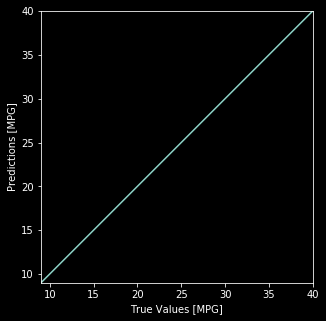

Model : 
    MLP         :  [10, 5]
    Fct_MLP     :  relu
    Fct_Out     :  relu

Epoch 00445: early stopping
MSE :  9.057336
Diff Min =  -6.736758041381837  Max =  6.557893371582031


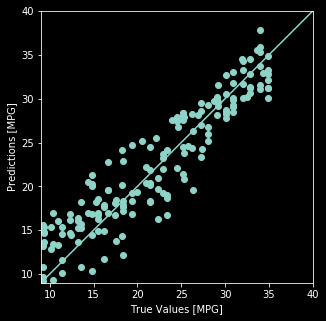

Model : 
    MLP         :  [10, 5]
    Fct_MLP     :  relu
    Fct_Out     :  linear

Epoch 00423: early stopping
MSE :  8.073304
Diff Min =  -8.143294715881346  Max =  7.790898513793945


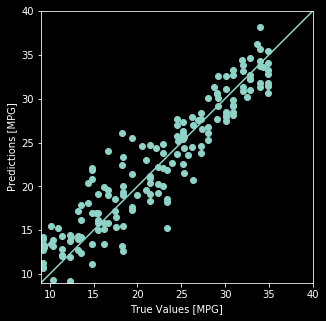

Model : 
    MLP         :  [7, 5]
    Fct_MLP     :  tanh
    Fct_Out     :  tanh

Epoch 00129: early stopping
MSE :  503.45227
Diff Min =  -33.9  Max =  -8.2


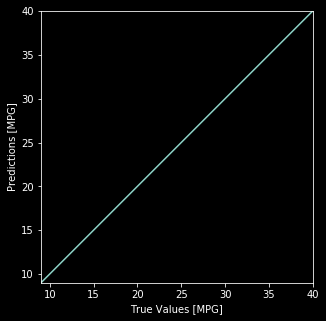

Model : 
    MLP         :  [7, 5]
    Fct_MLP     :  tanh
    Fct_Out     :  relu

Epoch 00395: early stopping
MSE :  6.9079404
Diff Min =  -7.565620803833006  Max =  7.905219268798827


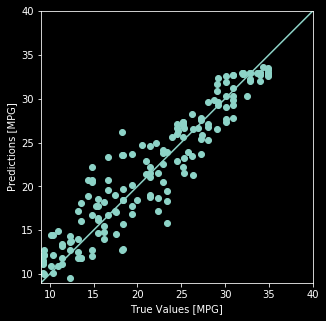

Model : 
    MLP         :  [7, 5]
    Fct_MLP     :  tanh
    Fct_Out     :  linear

Epoch 00270: early stopping
MSE :  6.90159
Diff Min =  -7.618797683715819  Max =  8.025185775756835


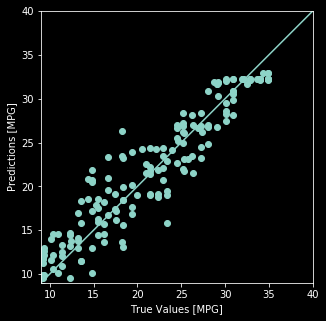

Model : 
    MLP         :  [7, 5]
    Fct_MLP     :  relu
    Fct_Out     :  tanh

Epoch 00116: early stopping
MSE :  503.45227
Diff Min =  -33.9  Max =  -8.2


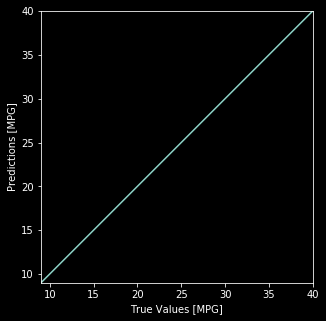

Model : 
    MLP         :  [7, 5]
    Fct_MLP     :  relu
    Fct_Out     :  relu

MSE :  8.524297
Diff Min =  -8.356274795532226  Max =  7.304545211791993


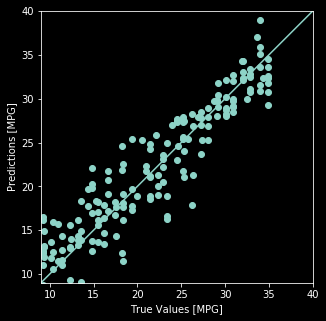

Model : 
    MLP         :  [7, 5]
    Fct_MLP     :  relu
    Fct_Out     :  linear

Epoch 00323: early stopping
MSE :  9.740229
Diff Min =  -10.576384735107421  Max =  6.998568725585937


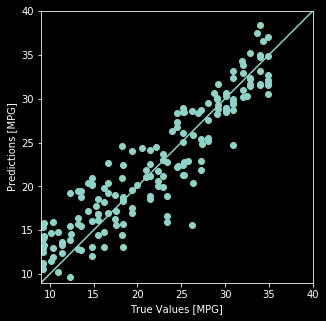

Model : 
    MLP         :  [5, 7]
    Fct_MLP     :  tanh
    Fct_Out     :  tanh

Epoch 00132: early stopping
MSE :  503.45227
Diff Min =  -33.9  Max =  -8.2


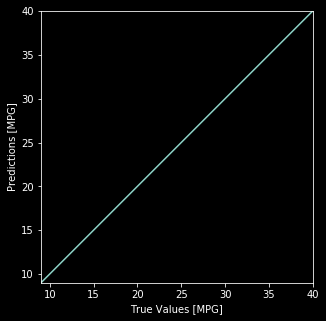

Model : 
    MLP         :  [5, 7]
    Fct_MLP     :  tanh
    Fct_Out     :  relu

Epoch 00304: early stopping
MSE :  6.9441257
Diff Min =  -7.56598606109619  Max =  7.50424690246582


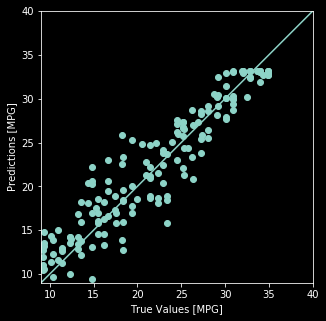

Model : 
    MLP         :  [5, 7]
    Fct_MLP     :  tanh
    Fct_Out     :  linear

Epoch 00379: early stopping
MSE :  7.152956
Diff Min =  -7.450325393676756  Max =  7.5823928833007805


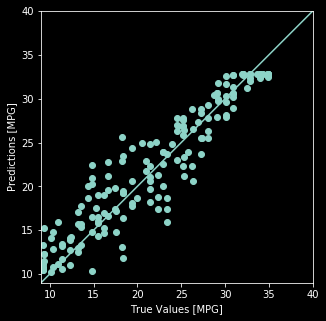

Model : 
    MLP         :  [5, 7]
    Fct_MLP     :  relu
    Fct_Out     :  tanh

Epoch 00117: early stopping
MSE :  503.45227
Diff Min =  -33.9  Max =  -8.2


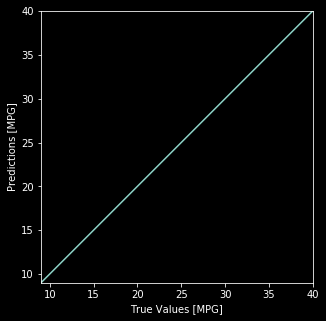

Model : 
    MLP         :  [5, 7]
    Fct_MLP     :  relu
    Fct_Out     :  relu

MSE :  20.908894
Diff Min =  -9.180331802368165  Max =  10.949509811401366


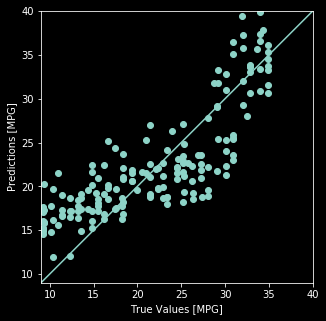

Model : 
    MLP         :  [5, 7]
    Fct_MLP     :  relu
    Fct_Out     :  linear

MSE :  7.8921957
Diff Min =  -7.421995544433592  Max =  7.499499511718749


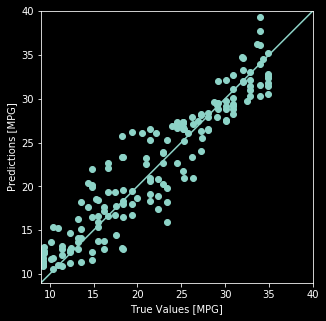

Model : 
    MLP         :  [5]
    Fct_MLP     :  tanh
    Fct_Out     :  tanh

Epoch 00171: early stopping
MSE :  503.45227
Diff Min =  -33.90000005960464  Max =  -8.2


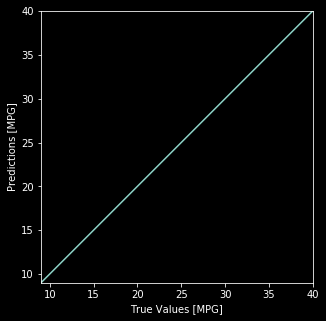

Model : 
    MLP         :  [5]
    Fct_MLP     :  tanh
    Fct_Out     :  relu

Epoch 00366: early stopping
MSE :  7.8089495
Diff Min =  -6.683842086791991  Max =  6.146722030639648


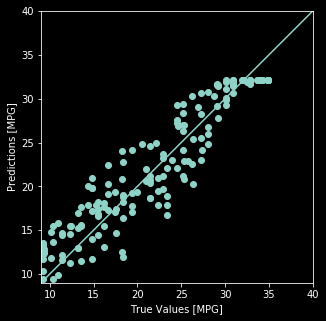

Model : 
    MLP         :  [5]
    Fct_MLP     :  tanh
    Fct_Out     :  linear

Epoch 00242: early stopping
MSE :  8.654828
Diff Min =  -7.2718729019165025  Max =  6.95356101989746


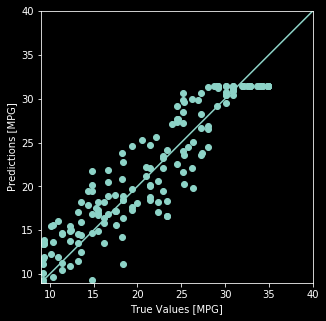

Model : 
    MLP         :  [5]
    Fct_MLP     :  relu
    Fct_Out     :  tanh

Epoch 00133: early stopping
MSE :  503.45227
Diff Min =  -33.9  Max =  -8.2


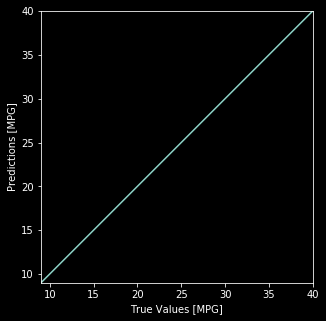

Model : 
    MLP         :  [5]
    Fct_MLP     :  relu
    Fct_Out     :  relu

Epoch 00101: early stopping
MSE :  546.44525
Diff Min =  -34.9  Max =  -9.2


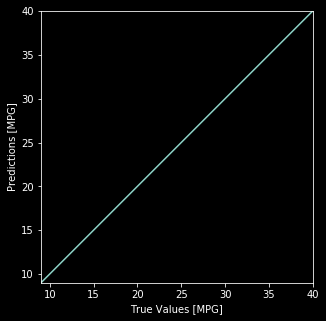

Model : 
    MLP         :  [5]
    Fct_MLP     :  relu
    Fct_Out     :  linear

MSE :  7.790633
Diff Min =  -6.604691314697266  Max =  6.59107322692871


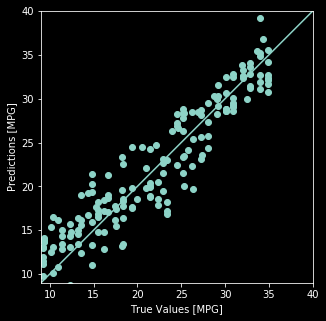

Model : 
    MLP         :  [10]
    Fct_MLP     :  tanh
    Fct_Out     :  tanh

Epoch 00147: early stopping
MSE :  503.45227
Diff Min =  -33.9  Max =  -8.2


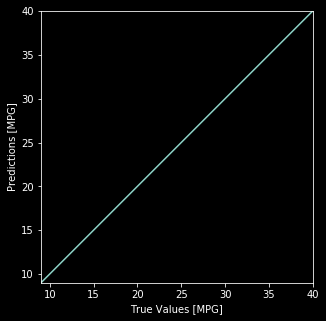

Model : 
    MLP         :  [10]
    Fct_MLP     :  tanh
    Fct_Out     :  relu

Epoch 00336: early stopping
MSE :  7.6955914
Diff Min =  -6.512928390502928  Max =  6.361062240600585


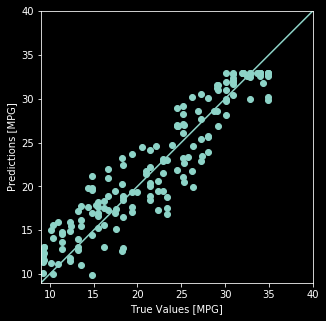

Model : 
    MLP         :  [10]
    Fct_MLP     :  tanh
    Fct_Out     :  linear

Epoch 00278: early stopping
MSE :  7.515869
Diff Min =  -6.5053676605224595  Max =  6.408496093749999


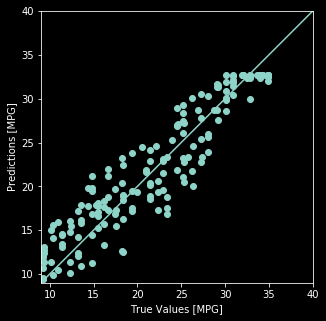

Model : 
    MLP         :  [10]
    Fct_MLP     :  relu
    Fct_Out     :  tanh

Epoch 00117: early stopping
MSE :  503.45227
Diff Min =  -33.9  Max =  -8.2


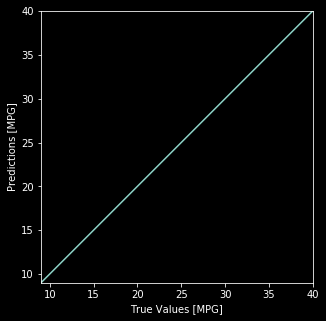

Model : 
    MLP         :  [10]
    Fct_MLP     :  relu
    Fct_Out     :  relu

MSE :  21.14833
Diff Min =  -9.1848445892334  Max =  10.963538360595702


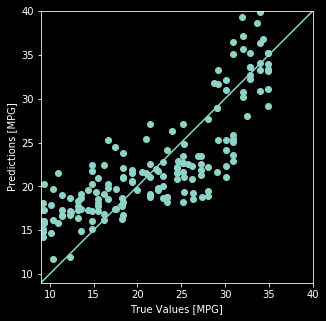

Model : 
    MLP         :  [10]
    Fct_MLP     :  relu
    Fct_Out     :  linear

Epoch 00241: early stopping
MSE :  11.534722
Diff Min =  -7.74870948791504  Max =  16.633045959472657


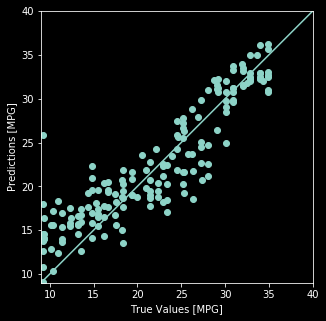

Model : 
    MLP         :  [7]
    Fct_MLP     :  tanh
    Fct_Out     :  tanh

Epoch 00147: early stopping
MSE :  503.45227
Diff Min =  -33.9  Max =  -8.2


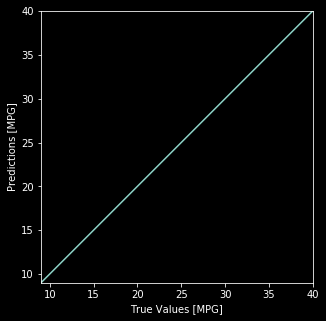

Model : 
    MLP         :  [7]
    Fct_MLP     :  tanh
    Fct_Out     :  relu

MSE :  7.635655
Diff Min =  -6.931391143798827  Max =  6.341618728637695


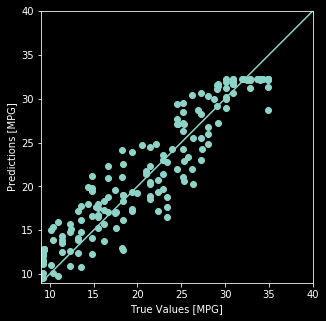

Model : 
    MLP         :  [7]
    Fct_MLP     :  tanh
    Fct_Out     :  linear

Epoch 00391: early stopping
MSE :  8.104529
Diff Min =  -7.933840179443358  Max =  6.682439041137695


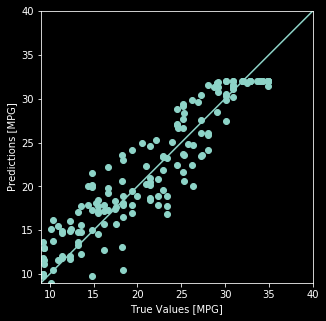

Model : 
    MLP         :  [7]
    Fct_MLP     :  relu
    Fct_Out     :  tanh

Epoch 00118: early stopping
MSE :  503.45227
Diff Min =  -33.9  Max =  -8.2


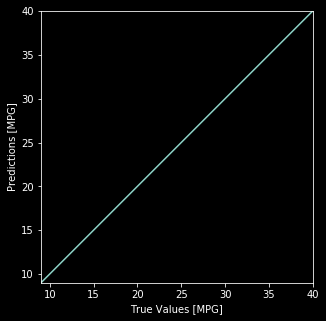

Model : 
    MLP         :  [7]
    Fct_MLP     :  relu
    Fct_Out     :  relu

MSE :  8.5354185
Diff Min =  -6.75572853088379  Max =  8.179238510131835


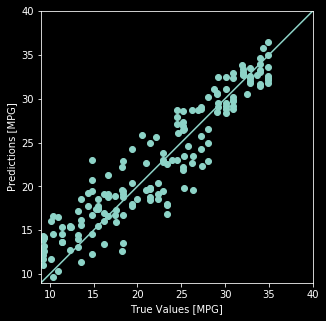

Model : 
    MLP         :  [7]
    Fct_MLP     :  relu
    Fct_Out     :  linear

MSE :  8.4441
Diff Min =  -7.271738815307618  Max =  9.66553955078125


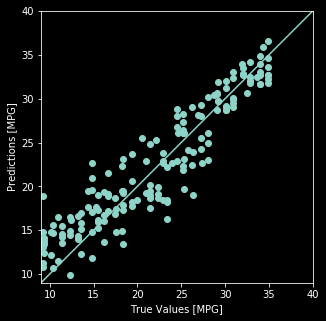

In [23]:
# Select callbacks
callbacks = [
    # Reduce learning rate if needed
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001),
    # Stop the learning if no improvements
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=100, verbose=1),
]
# Select Epochs and batch size
epochs = 500
batch_size = 10

''' Prepare combination '''
mlp = [[5,5], [10,10], [5,10], [10,5], [7,5], [5,7], [5], [10], [7]]
fct_mlp = ['tanh','relu']
fct_out = ['tanh','relu','linear']

''' Create grid search '''
grid = pd.DataFrame(list(product(mlp, fct_mlp, fct_out)), columns=['MLP', 'Fct_MLP', 'Fct_Out'])    
# Initialize best results
best_mse = 100
best_file = ""
best_model = grid.loc[0]

# Pre-processing of the features
file = ['C:/Temp/MeasHydroDone/Features/features_50_150.csv']
dataset = pd.read_csv(file[0])
dataset = dataset.drop(dataset.columns[0], axis=1)
train_X, train_y, test_X, test_y = split_dataset(dataset, testsize=0.2)
train_X_n, test_X_n = scale_features(train_X, test_X)
train_X_r, test_X_r = reduce_features(train_X_n, test_X_n)
# Start pseudo grid search
for index, row in grid.iterrows():
    print("Model : ")
    print("    MLP         : ", row['MLP'])
    print("    Fct_MLP     : ", row['Fct_MLP'])
    print("    Fct_Out     : ", row['Fct_Out'])
    print()
    # Prepare the model with parameters
    model = make_model(train_X_r.shape[1:], row['MLP'], row['Fct_MLP'], row['Fct_Out'])
    keras.utils.plot_model(model, show_shapes=True)
    # Compile it with optimizer and loss function
    model.compile(optimizer=keras.optimizers.RMSprop(), 
                  loss="mean_squared_error", 
                  metrics=[keras.losses.MeanSquaredError()])
    # Train the system
    history = model.fit(
        train_X_r,
        train_y,
        batch_size=batch_size,
        epochs=epochs,
        callbacks=callbacks,
        validation_split=0.2,
        verbose=0
    )
    # Predict and check the best result
    pred = model.predict(test_X_r)
    mse = keras.losses.MeanSquaredError()
    res_mse = mse(test_y, pred.flatten()).numpy()
    print("MSE : ",res_mse)
    plotTestPred(test_y, pred.flatten())
    if(res_mse < best_mse):
        best_mse = res_mse
        best_file = file
        best_model = row

In [27]:
# Print the best Results
print("Shape = ", grid.shape)
print("Best MSE = ", best_mse)
print("Best model = ", best_model)

Shape =  (54, 3)
6.562111
[(12, 'relu'), (24, 'relu'), (12, 'relu')]
